In [2]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Connect to Snowflake
conn = snowflake.connector.connect(
    user='SHAKIRASNOWFLAKE',
    password='Shakira@123',
    account='dttovyk-hj49533',
    warehouse='COMPUTE_WH',
    database='TrainData',
    schema='PublicSchema'
)

In [5]:

query = "SELECT * FROM TrainDetails;"


In [6]:
# Execute the query and fetch the data into a pandas DataFrame
df = pd.read_sql(query, conn)

C:\Users\hp\AppData\Local\Temp\ipykernel_7704\3242930654.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [7]:

# Close the connection
conn.close()


In [8]:
df

,TRAIN_NO,TRAIN_NAME,SOURCE_STATION_NAME,DESTINATION_STATION_NAME,DAYS,DAYCATEGORY
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,SATURDAY,Weekday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,FRIDAY,Weekday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,FRIDAY,Weekday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,WEDNESDAY,Weekday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,SATURDAY,Weekday
...,...,...,...,...,...,...
11108,99904,PUNE-TGN EMU,PUNE JN.,TALEGAON,TUESDAY,Weekday
11109,99905,EMU,TALEGAON,SHIVAJINAGAR,MONDAY,Weekday
11110,99906,EMU,PUNE JN.,TALEGAON,WEDNESDAY,Weekday
11111,99907,EMU,TALEGAON,PUNE JN.,THURSDAY,Weekday


In [9]:
# Display the DataFrame
df.head()  # Display the first few rows of the data

,TRAIN_NO,TRAIN_NAME,SOURCE_STATION_NAME,DESTINATION_STATION_NAME,DAYS,DAYCATEGORY
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,SATURDAY,Weekday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,FRIDAY,Weekday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,FRIDAY,Weekday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,WEDNESDAY,Weekday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,SATURDAY,Weekday


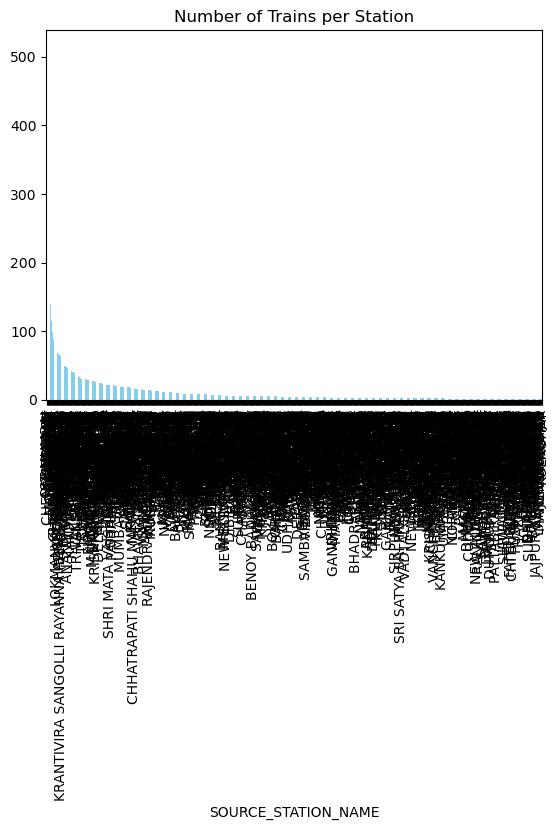

In [8]:
# Visualization
train_count = df['SOURCE_STATION_NAME'].value_counts()
train_count.plot(kind='bar', color='skyblue')
plt.title('Number of Trains per Station')
plt.savefig('Barchart.png')
plt.show()

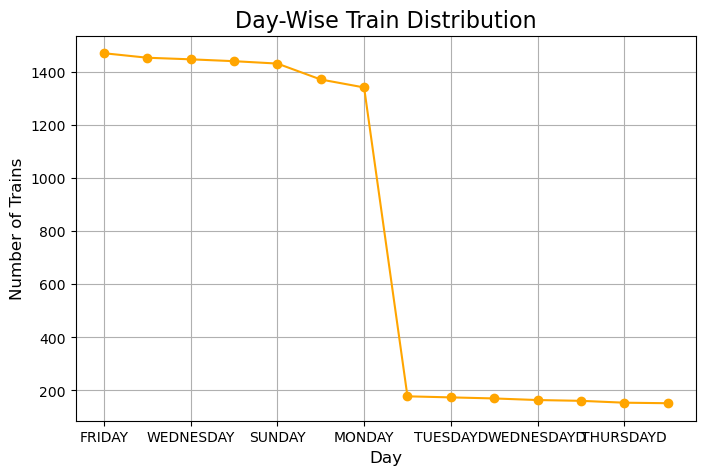

In [20]:
# Assuming 'OperatingDays' contains a day-wise distribution (e.g., Monday, Tuesday)
day_data = df['DAYS'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
day_data.plot(kind='line', marker='o', color='orange')
plt.title('Day-Wise Train Distribution', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Number of Trains', fontsize=12)
plt.grid()
plt.savefig('linechart.png')
plt.show()


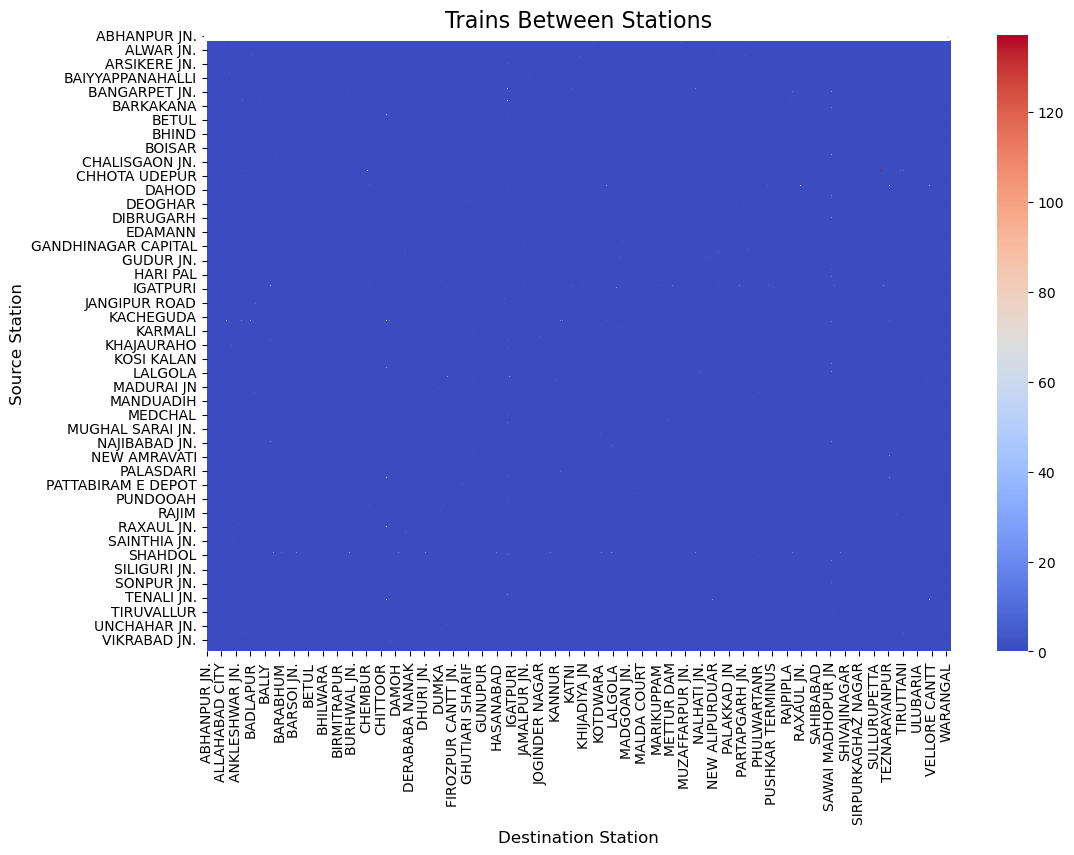

In [18]:
# Create a pivot table for heatmap (example)
pivot = df.pivot_table(
    index='SOURCE_STATION_NAME',
    columns='DESTINATION_STATION_NAME',
    values='TRAIN_NO',
    aggfunc='count',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='d')
plt.title('Trains Between Stations', fontsize=16)
plt.xlabel('Destination Station', fontsize=12)
plt.ylabel('Source Station', fontsize=12)
plt.savefig('train.png')
plt.show()
